In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# constants 
path = "E:\\Andreea\\Projects\\Git\\SmartsuitWrapper\\SmartuistWrapper\\tapResultParticipants.csv"
playerNr = 26

idxLength = 28
idxGain = 29

In [9]:
def readFromFile(path):
    results = [0] * 100
    f = open(path, "r")
    player = -1
    for x in f:
        line = x.split(',')
        if len(line) == 31:
            if int(line[0]) == player:
                results[player].append(line)
            else:
                player = int(line[0])
                results[player] = []
                results[player].append(line)
    f.close()
    return results


# a list with the results at idx for the given player    
def getResultPerPlayer(p, results, idx, unique ):
    tmp = results[p]
    values = []
    for words in tmp:
        values.append(float(words[idx]))
    if (unique == True):
        values =  [x for i, x in enumerate(values) if i == values.index(x)]
    return values

# sort list1 - use the indexes of the sorted list1 to rearrage list2    
def getCombinedPlot(list1, list2):
    idx   = np.argsort(list1)
    list1 = np.array(list1)[idx]
    list2 = np.array(list2)[idx]
    
    plt.xticks(np.arange(min(list1), max(list1)+1, 1.0))
    plt.plot(list1[1:], list2[1:], 'o-')
    plt.show()
        
    return (list1, list2)

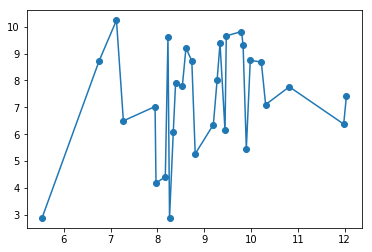

[ 1.        2.880269  8.741206 10.24334   6.495286  7.028502  4.184795
  4.406488  9.616346  2.880269  6.098196  7.893424  7.798363  9.20982
  8.726917  5.265928  6.353817  8.030278  9.38333   6.137129  9.659632
  9.822789  9.321329  5.463017  8.749969  8.68667   7.099563  7.765506
  6.375232  7.418309]
[-1.        5.536394  6.758366  7.126275  7.273974  7.951042  7.97104
  8.169872  8.226345  8.259851  8.340491  8.388875  8.53422   8.610863
  8.736044  8.808363  9.196017  9.277244  9.338404  9.445196  9.47244
  9.797215  9.831389  9.900501  9.98497  10.22033  10.31318  10.81809
 11.98063  12.0385  ]
Optimal lenght:  7.186349


In [10]:
results = readFromFile(path)

lengths = getResultPerPlayer(playerNr, results, idxLength, True)
gain = getResultPerPlayer(playerNr, results, idxGain, True)

for i in range(len(lengths)-1, 1, -1):   
        lengths[i] = lengths[i-1]


gain, lengths = getCombinedPlot(gain, lengths)

# get avg length for the top 3 values of gain
print(lengths)
print(gain)
avg = sum(lengths[-3:]) / 3
print("Optimal lenght: ", avg)